In [1]:
import pandas as pd
from astropy.table import Table
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import animation
import numpy as np
%matplotlib inline
sns.set_color_codes()

In [2]:
df =  pd.read_csv("confirmedLSBs_Fornax.csv")
print("Number of objects:", len(df))
print(df.columns)

Number of objects: 122
Index(['Field', 'ID', 'RA', 'DEC', 'X', 'Y', 'ISOarea', 'MU_MAX', 'A', 'B',
       ...
       'I_PStotal', 'e_I_PStotal', 's2n_I_PStotal', 'F861_PStotal',
       'e_F861_PStotal', 's2n_F861_PStotal', 'Z_PStotal', 'e_Z_PStotal',
       's2n_Z_PStotal', 'nDet_magPStotal'],
      dtype='object', length=283)


In [3]:
df_f =  pd.read_csv("Fornax.csv")
df_f[:7]

,ID,RA,DEC,CLASS_STAR,ELLIPTICITY,ELONGATION,FLUX_RADIUS,FWHM,ISOarea,KRON_RADIUS,...,r_aper_6,r_petro,J0660_auto,e_J0660_auto,i_auto,e_i_auto,J0861_auto,e_J0861_auto,z_auto,e_z_auto
0,iDR3.SPLUS-s25s32.020036,49.494328,-32.350563,0.459624,0.449875,1.817768,"[1.242211,2.5662715,5.71492,6.890029]",6.085031,4,7.132851,...,22.020140,22.050888,21.547064,0.332771,20.859621,0.228180,21.274414,0.722951,21.610172,0.819430
1,iDR3.SPLUS-s25s32.020080,50.198927,-32.346923,0.109929,0.570968,2.330827,"[,2.5440927,6.0819097,13.687574,16.590715]",10.850546,6,6.866231,...,21.406225,21.159723,21.103397,0.364895,21.307234,0.578285,19.840270,0.325530,19.682186,0.234320
2,iDR3.SPLUS-s25s32.000003,48.584174,-32.943812,0.354856,0.540795,2.177678,"[1.6309174,6.080961,8.323008,8.323008]",5.599145,3,8.338106,...,21.733967,22.002377,22.599194,0.931227,21.177631,0.337640,23.768717,7.871729,20.785189,0.421435
3,iDR3.SPLUS-s25s32.020094,49.989457,-32.347656,0.359414,0.614246,2.592326,"[1.7771757,4.343724,5.75436,8.281901]",0.000000,1,7.876084,...,22.345322,22.107891,20.608524,0.196191,20.660837,0.268005,20.264135,0.403934,20.136244,0.298935
4,iDR3.SPLUS-s25s32.020131,49.084647,-32.347389,0.001687,0.147096,1.172465,"[1.2690732,2.1671884,2.9067676,4.002029]",10.163368,16,6.591668,...,20.751575,20.507515,20.539282,0.200926,21.079853,0.427792,21.307450,1.145674,20.711657,0.551694
5,iDR3.SPLUS-s25s32.020154,49.120796,-32.346761,0.352127,0.570009,2.325628,"[2.2475142,4.255869,5.7240915,9.093431]",0.000000,0,9.242299,...,21.277360,21.066496,21.307652,0.332644,20.876568,0.290862,20.781640,0.578610,21.313140,0.785182
6,iDR3.SPLUS-s25s32.020167,48.998876,-32.346299,0.079948,0.368976,1.584726,"[1.0609581,1.928098,2.6100047,3.696454]",5.915680,8,6.762239,...,21.842730,21.736881,21.575140,0.382382,22.203756,0.887705,20.599016,0.441643,20.181122,0.250489


In [4]:
# calculate summary statistics for the data
df_f.describe().transpose()       

,count,mean,std,min,25%,50%,75%,max
RA,122195.0,52.292324,2.774702,47.555626,50.007552,51.294308,54.513133,59.197326
DEC,122195.0,-34.435479,1.611281,-38.221105,-35.560757,-33.941636,-33.268483,-31.514553
CLASS_STAR,122195.0,0.289079,0.231272,0.000024,0.053779,0.347600,0.431060,0.999889
ELLIPTICITY,122195.0,0.306117,0.175057,0.000090,0.169919,0.292531,0.419634,0.890988
ELONGATION,122195.0,1.566568,0.546375,1.000090,1.204701,1.413490,1.723050,9.173266
FWHM,122195.0,4.582298,3.526494,-22.312414,2.075230,4.721915,6.732801,346.055760
ISOarea,122195.0,12.221351,193.880598,0.000000,1.000000,3.000000,7.000000,42197.000000
KRON_RADIUS,122195.0,6.947815,1.967647,0.000000,6.531031,7.217474,8.152172,12.307342
MU_MAX,122195.0,17.886715,0.953475,9.069814,17.775194,18.121979,18.341549,19.720228
A,122195.0,1.437304,0.684872,0.496715,1.045812,1.352952,1.701911,82.813835


Many sources do not have detection on the r-band, that have 99 value

In [5]:
# drop 99 value on the r-band
mask = df_f["r_auto"] != 99.
#df_fnew = df_f[mask]
df_f=df_f.mask(df_f["r_auto"] == 99.) 
df_f.describe().transpose() 

,count,mean,std,min,25%,50%,75%,max
RA,118350.0,52.375484,2.778122,47.555626,50.066332,51.567279,54.607582,59.197326
DEC,118350.0,-34.466654,1.626036,-38.221105,-35.620268,-33.967975,-33.280872,-31.514553
CLASS_STAR,118350.0,0.288229,0.232930,0.000024,0.052841,0.347576,0.431019,0.999889
ELLIPTICITY,118350.0,0.303778,0.173307,0.000090,0.169013,0.289333,0.416806,0.890988
ELONGATION,118350.0,1.557842,0.536062,1.000090,1.203388,1.407130,1.714696,9.173266
FWHM,118350.0,4.649383,3.509200,-22.312414,2.175852,4.797357,6.775927,346.055760
ISOarea,118350.0,12.567047,196.994386,0.000000,1.000000,3.000000,8.000000,42197.000000
KRON_RADIUS,118350.0,6.946760,1.935139,0.000000,6.538283,7.211893,8.126989,12.307342
MU_MAX,118350.0,17.874964,0.962862,9.069814,17.765944,18.115874,18.335602,19.720228
A,118350.0,1.448245,0.682410,0.496715,1.062465,1.362493,1.709479,82.813835


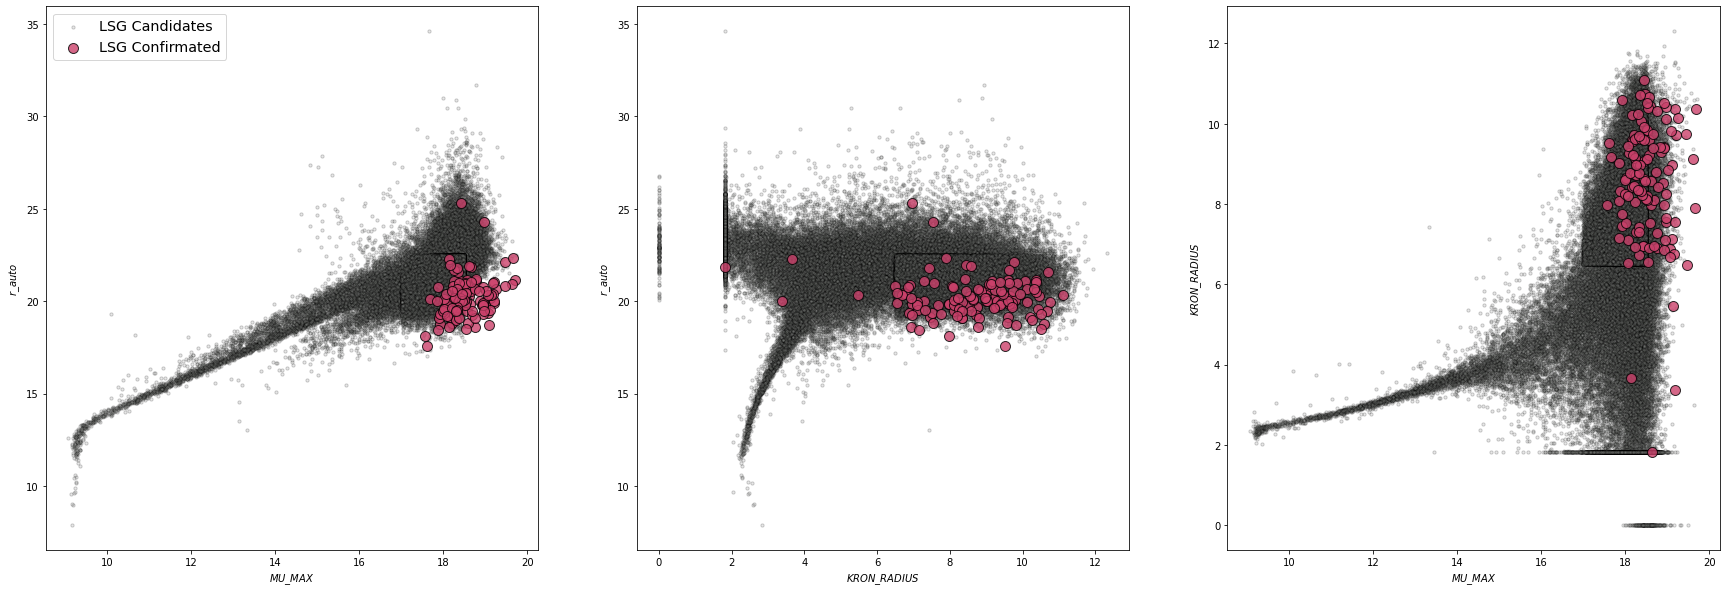

In [6]:
#fig2, ax2 = plt.subplots(1,1, figsize=(13, 10))
fig2, (ax2, ax3, ax4) = plt.subplots(1, 3, figsize=(30, 10))
ax2.scatter(df_f["MU_MAX"], df_f["r_auto"], c=sns.xkcd_rgb['grey'], s=10, edgecolor='black', alpha=0.2, label="LSG Candidates")
ax2.scatter(df["MU_MAX"], df["R_auto"], c=sns.xkcd_rgb['dark pink'], s=100, edgecolor='black', alpha=0.8, zorder=3, label="LSG Confirmated")
ax3.scatter(df_f["KRON_RADIUS"], df_f["r_auto"], c=sns.xkcd_rgb['grey'], s=10, edgecolor='black', alpha=0.2, label="LSG Candidates")
ax3.scatter(df["KRON_RADIUS"], df["R_auto"], c=sns.xkcd_rgb['dark pink'], s=100, edgecolor='black', alpha=0.8, zorder=3, label="LSG Confirmated")
ax4.scatter(df_f["MU_MAX"], df_f["KRON_RADIUS"], c=sns.xkcd_rgb['grey'], s=10, edgecolor='black', alpha=0.2, label="LSG Candidates")
ax4.scatter(df["MU_MAX"], df["KRON_RADIUS"], c=sns.xkcd_rgb['dark pink'], s=100, edgecolor='black', alpha=0.8, zorder=3, label="LSG Confirmated")

ax2.set(
    #xlim=[17, 20],
    #ylim=[1, 11],
    xlabel=r"$MU\_MAX$",
    ylabel=r"$r\_auto$")
ax3.set(
    #xlim=[17, 20],
    #ylim=[1, 11],
    xlabel=r"$KRON\_RADIUS$",
    ylabel=r"$r\_auto$")
ax4.set(
    #xlim=[17, 20],
    #ylim=[1, 11],
    xlabel=r"$MU\_MAX$",
    ylabel=r"$KRON\_RADIUS$")
ax2.legend(fontsize="x-large", loc="upper left")

Text(0.5, 0, '$r\\_auto$')

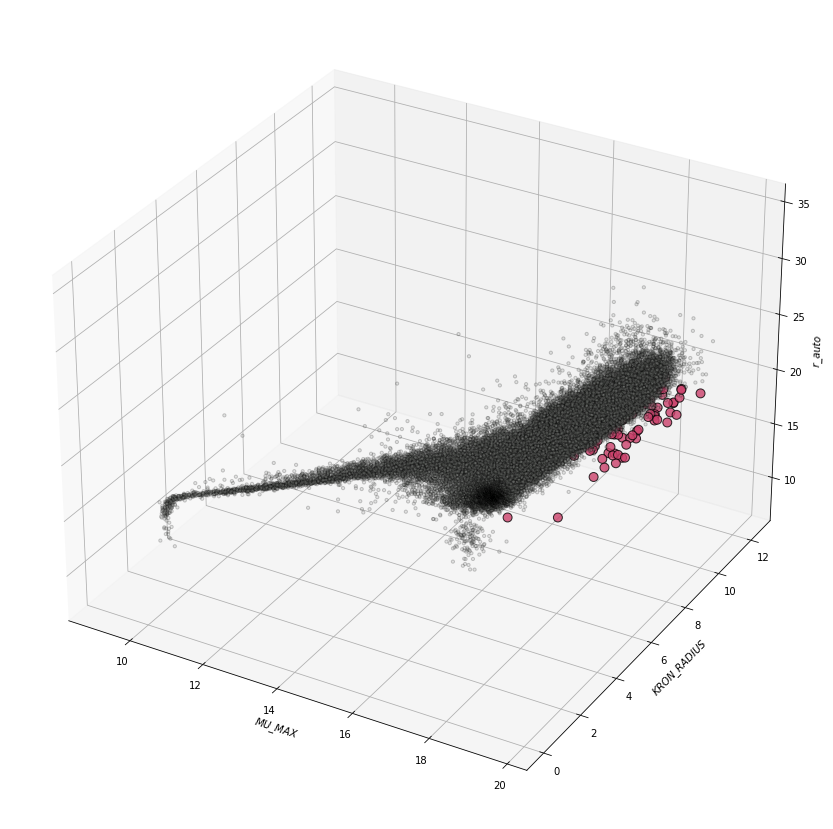

In [7]:
import seaborn as sns
from matplotlib import animation
from mpl_toolkits import mplot3d

fig4, ax4 = plt.subplots(figsize=(15, 15)), plt.axes(projection='3d')
ax4.scatter3D(df_f["MU_MAX"], df_f["KRON_RADIUS"], df_f["r_auto"],
            c=sns.xkcd_rgb['grey'], s=10, edgecolor='black', alpha=0.2, 
            cmap=plt.cm.get_cmap('Accent', 10))
ax4.scatter3D(df["MU_MAX"], df["KRON_RADIUS"], df["R_auto"],
            c=sns.xkcd_rgb['dark pink'], s=80, edgecolor='black', alpha=0.8,
            cmap=plt.cm.get_cmap('Accent', 15))
ax4.set_xlabel(r'$MU\_MAX$')
ax4.set_ylabel(r'$KRON\_RADIUS$')
ax4.set_zlabel(r'$r\_auto$')

# rotate the axes and update
#for angle in range(0, 360):
    #ax2.view_init(30, angle)
    #plt.draw()
    #plt.pause(.001)
#ax2.set(xlim=[-5.0, 20.0], ylim=[-5.0, 10.0], zlim=[-5.0, 6.0])

/home/luis/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/luis/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


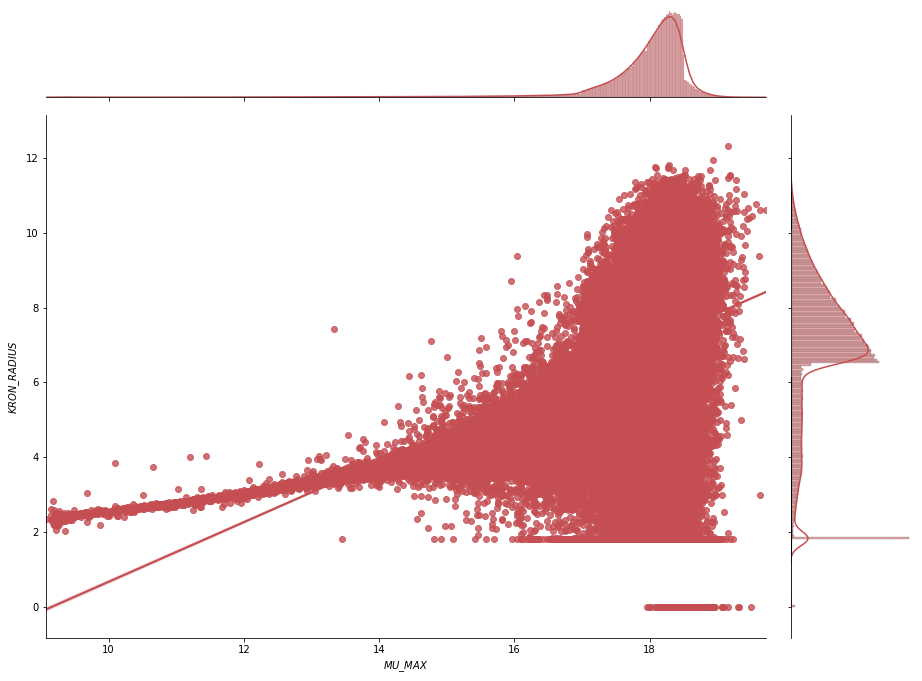

In [8]:
ax5 = sns.jointplot(df_f["MU_MAX"], df_f["KRON_RADIUS"], kind="reg", color="r")
ax5.ax_joint.set(
               xlabel=r"$MU\_MAX$",
    ylabel=r"$KRON\_RADIUS$")
pal = sns.cubehelix_palette(start=1, rot=0, dark=-10, light=50, reverse=True, as_cmap=True)
sns.kdeplot(
    df_f["MU_MAX"], df_f["KRON_RADIUS"],
    cmap=pal,
)
# Limiting the blue and red region
x_new = np.linspace(-15.0, 1000, 200)
y = 0.35*x_new + 1.5

#ax.ax_joint.set_aspect("equal")
ax5.fig.set_size_inches(14, 10)

In [9]:
# choosing columns
cols = ["MU_MAX", "KRON_RADIUS", "r_auto"]
new_df_f = df_f[cols]
new_df_f[:5]

,MU_MAX,KRON_RADIUS,r_auto
0,18.229320,7.132851,21.923925
1,18.337140,6.866231,20.336857
2,17.924402,8.338106,21.640142
3,18.066620,7.876084,21.886637
4,17.857449,6.591668,20.371187


/home/luis/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


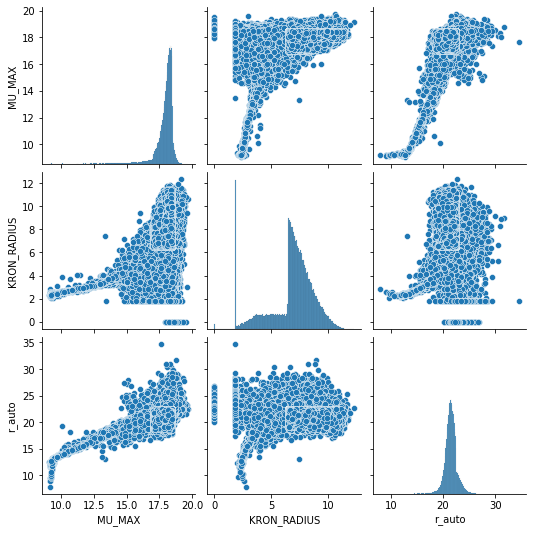

In [10]:
sns.pairplot(new_df_f, size=2.5);

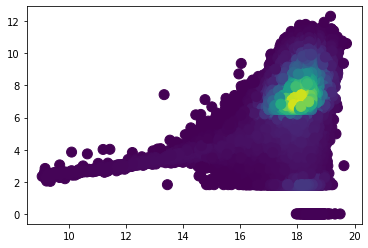

In [12]:
from scipy.stats import gaussian_kde
# drop inf and nan

# Calculate the point density
t = Table.from_pandas(df_f)
xx = np.nan_to_num(t["MU_MAX"])
yy = np.nan_to_num(t["KRON_RADIUS"])

xy = np.vstack([xx, yy])
z = gaussian_kde(xy)(xy)

fig, ax = plt.subplots()
ax.scatter(xx, yy, c=z, s=100)
plt.show()


There is a high-density zone in all plots. It is very strange because this zone is a very symmetrical rectangle.